# PCA with UV-Vis data (190-300 nm)

In [4]:
# Import packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mpl_toolkits import mplot3d

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

# Set seed
seed = 4

In [5]:
# Import data
data = pd.read_csv('Datasets/urea_saline_uvvis.csv')

In [7]:
data

,urea_concentration (mM),190,191,192,193,194,195,196,197,198,...,491,492,493,494,495,496,497,498,499,500
0,0.5,0.584,0.477,0.379,0.297,0.239,0.183,0.138,0.106,0.082,...,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,0.000
1,0.5,0.582,0.474,0.376,0.295,0.237,0.180,0.136,0.103,0.079,...,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001
2,0.5,0.598,0.483,0.386,0.303,0.247,0.189,0.145,0.113,0.089,...,-0.001,-0.001,0.000,-0.001,-0.001,-0.001,-0.001,-0.001,0.000,0.000
3,4.0,1.792,1.859,1.862,1.713,1.441,1.154,0.883,0.681,0.516,...,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,0.000
4,4.0,1.778,1.841,1.863,1.732,1.469,1.178,0.905,0.695,0.524,...,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,0.000
5,4.0,1.788,1.846,1.856,1.721,1.456,1.169,0.895,0.687,0.517,...,-0.001,0.000,0.000,0.000,0.000,-0.001,-0.001,0.000,0.000,0.000
6,8.0,1.829,1.910,2.000,2.050,1.999,1.868,1.584,1.274,0.985,...,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001
7,8.0,1.819,1.915,2.006,2.050,2.005,1.873,1.597,1.289,0.996,...,0.000,0.001,0.001,0.001,0.000,0.000,0.001,0.001,0.001,0.001
8,8.0,1.816,1.909,1.997,2.056,2.008,1.867,1.593,1.285,0.995,...,-0.001,-0.001,0.000,-0.001,0.000,-0.001,-0.001,-0.001,0.000,0.000
9,15.0,1.862,1.944,2.051,2.111,2.110,2.114,2.107,1.971,1.670,...,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,0.000


In [19]:
# Define features and targets
X = data.drop(data.columns[0:1], axis=1)
X = X.drop(X.columns[111:311], axis=1)
y = data['urea_concentration (mM)']

In [21]:
# Normalize data
sc = StandardScaler()
X = sc.fit_transform(X)

In [22]:
# Do PCA
pca = PCA(n_components=10, random_state=seed)
X_pca = pca.fit_transform(X)

print("Variance explained by all 10 PC's =", sum(pca.explained_variance_ratio_ *100))

Variance explained by all 10 PC's = 98.52276069148662


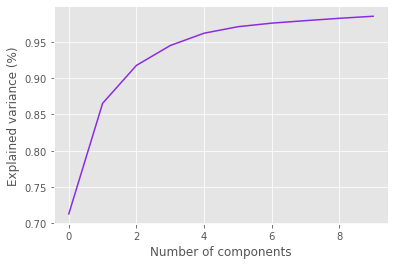

In [23]:
# Elbow Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='blueviolet')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (%)')
plt.savefig('elbow_plot.png', dpi=100)

In [24]:
np.cumsum(pca.explained_variance_ratio_)

array([0.71302578, 0.86532096, 0.91753179, 0.94491143, 0.96185756,
       0.97080077, 0.97571847, 0.97917262, 0.98237562, 0.98522761])

Text(0, 0.5, 'Second principal component')

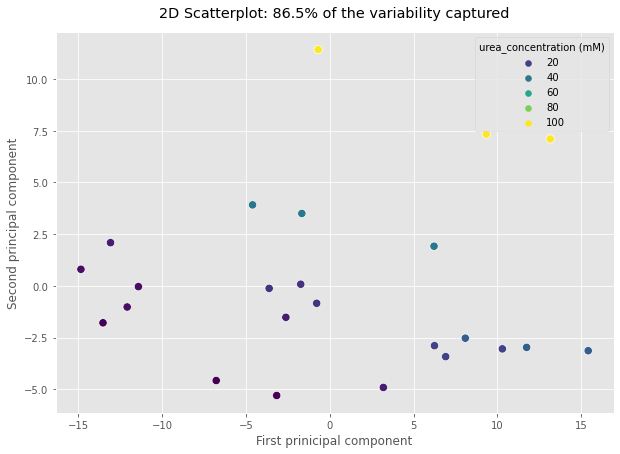

In [27]:
# If we apply PCA with n_components=2
pca_2 = PCA(n_components=2, random_state=seed)
X_pca_2 = pca_2.fit_transform(X)


# Plot it
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], s=70,
               hue=y, palette='viridis')

plt.title('2D Scatterplot: 86.5% of the variability captured', pad=15)
plt.xlabel('First prinicipal component')
plt.ylabel('Second principal component')

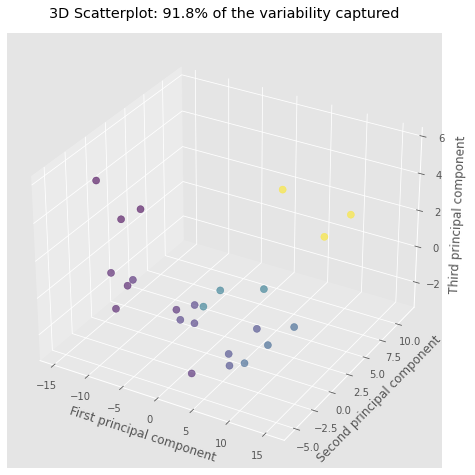

In [28]:
# Plot it in 3D
pca_3 = PCA(n_components=3, random_state=seed)
X_pca_3 = pca_3.fit_transform(X)

fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2],
                   c = y, s=50, alpha=0.6)

plt.title('3D Scatterplot: 91.8% of the variability captured', pad=15)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')
plt.savefig('3d_scatterplot.png')